<a href="https://colab.research.google.com/github/campeone-pixel/soccer_database/blob/master/ProyectoDS_ParteI_%2BCannoni%2BPoses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sqlite3
import pandas as pd
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# df_games = pd.read_csv("games.csv")
# df_teams = pd.read_csv("teams.csv")
# df_teamstats = pd.read_csv("teamstats.csv")
# df_leagues = pd.read_csv("leagues.csv")
# df_appearances = pd.read_csv("appearances.csv")
# df_players = pd.read_csv("players.csv", encoding="ISO-8859-1")
# df_shots = pd.read_csv("shots.csv")


df_games = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/games.csv")
df_teams = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/teams.csv")
df_teamstats = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/teamstats.csv")
df_leagues = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/leagues.csv")
df_appearances = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/appearances.csv")
df_players = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/players.csv", encoding="ISO-8859-1")
df_shots = pd.read_csv("https://raw.githubusercontent.com/campeone-pixel/soccer_database/master/shots.csv")

# Organizamos las tablas

## Primero mergeamos las tablas de df_leagues,df_teams y df_teamstats con df_games

In [5]:
df_teamstats_away = df_teamstats.loc[df_teamstats["location"] == "a"]
df_teamstats_home = df_teamstats.loc[df_teamstats["location"] == "h"]
df_teamstats_merged = pd.merge(
    df_teamstats_home, df_teamstats_away, on="gameID", suffixes=["_home", "_away"]
)

df_games_merged_with_teamstats = pd.merge(
    df_games, df_teamstats_merged, on="gameID", suffixes=("", "_remove")
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    df_games_merged_with_teamstats.iloc[:, 13:34], axis=1
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    ["homeProbability", "drawProbability", "awayProbability"], axis=1
)
df_games_merged_with_teamstats = df_games_merged_with_teamstats.drop(
    ["teamID_home", "teamID_away"], axis=1
)

df_games_merged_with_leagues = pd.merge(
    df_games_merged_with_teamstats, df_leagues, on="leagueID"
)

df_games_merged_with_team = pd.merge(
    df_games_merged_with_leagues,
    df_teams,
    left_on=["homeTeamID"],
    right_on=["teamID"],
    how="left",
)
df_games_merged_with_team = pd.merge(
    df_games_merged_with_team,
    df_teams,
    left_on=["awayTeamID"],
    right_on=["teamID"],
    how="left",
)

df_f_game = df_games_merged_with_team.rename(
    columns={"name_x": "liga", "name_y": "home_name", "name": "away_name"}
)
df_f_game = df_f_game.drop(
    [
        "understatNotation",
        "season_home",
        "date_home",
        "location_home",
        "goals_away",
        "goals_home",
        "season_away",
        "date_away",
        "location_away",
        "location_away",
        "teamID_x",
        "teamID_y",
    ],
    axis=1,
)

In [6]:
df_f_game['month'] = pd.DatetimeIndex(df_f_game['date']).month

<AxesSubplot: ylabel='gameID'>

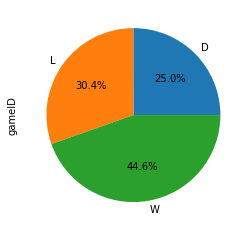

In [7]:
df_f_game.groupby(['result_home'])['gameID'].count().plot(kind = "pie",autopct='%1.1f%%')

In [8]:
df_f_game["totalGoals"]= df_f_game["homeGoals"]  + df_f_game["awayGoals"]
df_f_game["goal_diff"]= abs(df_f_game["homeGoals"]  - df_f_game["awayGoals"])

<AxesSubplot: xlabel='season'>

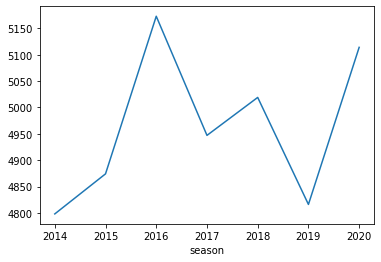

In [9]:
df_f_game.groupby(['season'])['totalGoals'].sum().plot()

<AxesSubplot: xlabel='liga,season'>

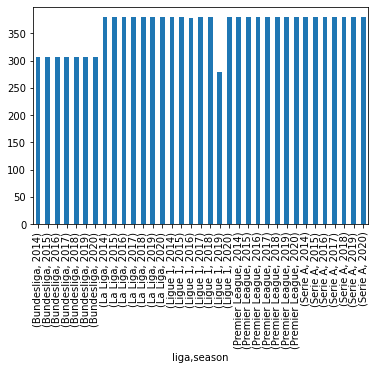

In [10]:
df_f_game.groupby(['liga','season'])['gameID'].count().plot(kind='bar')

<AxesSubplot: xlabel='month', ylabel='Count'>

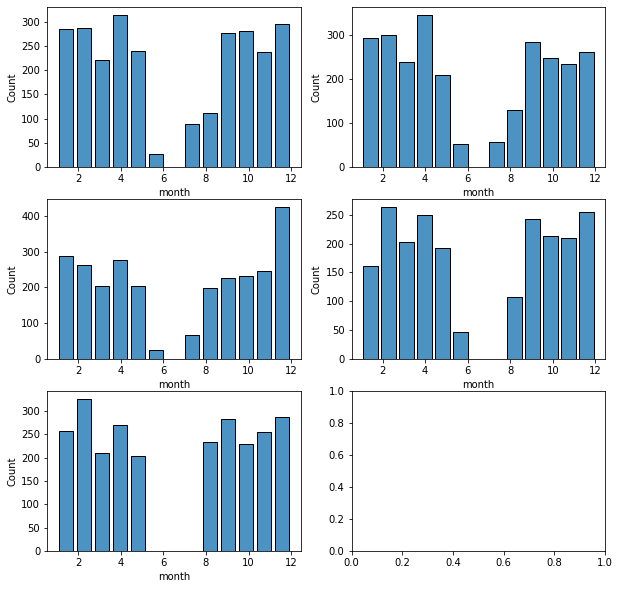

In [11]:
df_f_game_seriea=df_f_game.loc[df_f_game['liga']=="Serie A"]
df_f_game_laliga=df_f_game.loc[df_f_game['liga']=="La Liga"]
df_f_game_premier=df_f_game.loc[df_f_game['liga']=="Premier League"]
df_f_game_bundesliga=df_f_game.loc[df_f_game['liga']=="Bundesliga"]
df_f_game_ligue1=df_f_game.loc[df_f_game['liga']=="Ligue 1"]

figure, axis = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(data=df_f_game_seriea, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[0,0])
sns.histplot(data=df_f_game_laliga, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[0,1])
sns.histplot(data=df_f_game_premier, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[1,0])
sns.histplot(data=df_f_game_bundesliga, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[1,1])
sns.histplot(data=df_f_game_ligue1, x="month",  shrink=.8, alpha=.8, legend=False,ax=axis[2,0])


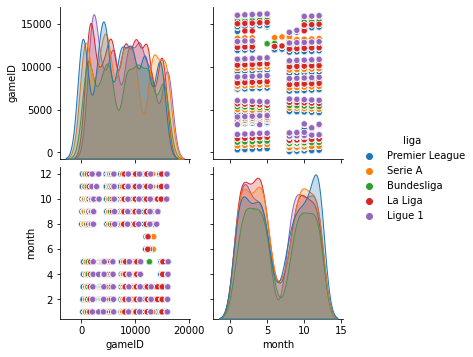

In [12]:
data=df_f_game.loc[:,["gameID","month","liga"]]
sns.pairplot(data=data, hue="liga")


## Mergeamos las tablas de df_apperances,df_shots y df_players

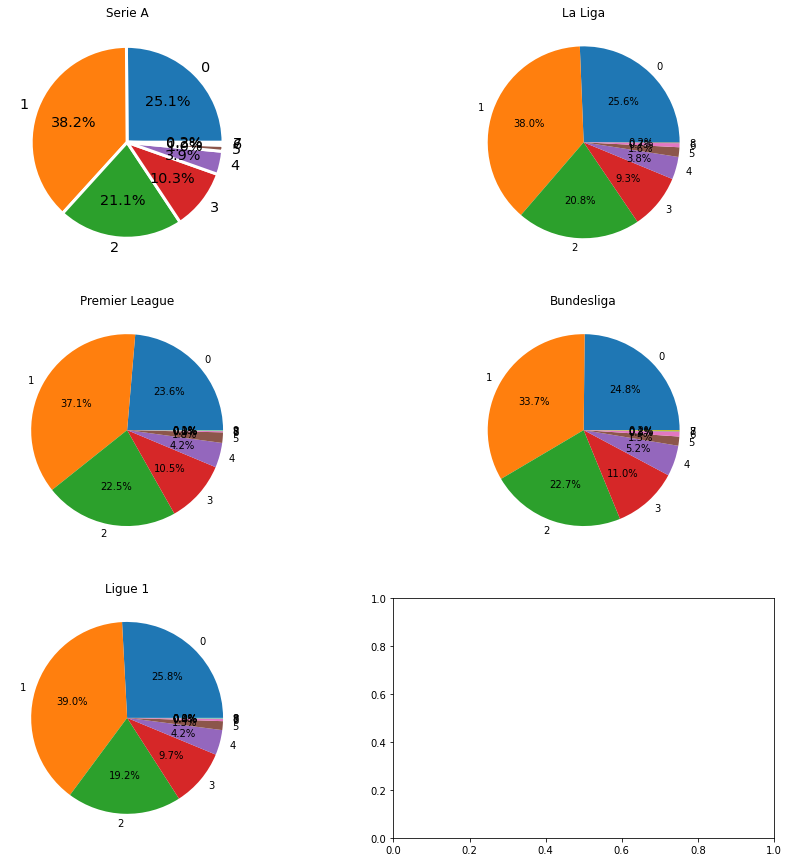

In [13]:

x_seriea=df_f_game_seriea.groupby(['goal_diff'])['gameID']
x_laliga=df_f_game_laliga.groupby(['goal_diff'])['gameID']
x_premier=df_f_game_premier.groupby(['goal_diff'])['gameID']
x_bundesliga=df_f_game_bundesliga.groupby(['goal_diff'])['gameID']
x_ligue1=df_f_game_ligue1.groupby(['goal_diff'])['gameID']



fig, ax = plt.subplots(3, 2, figsize=(15, 15))


ax[0,0].pie(x_seriea.count(),labels= x_seriea.groups.keys(), autopct='%.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})
ax[0,1].pie(x_laliga.count(),labels= x_laliga.groups.keys(), autopct='%.1f%%')
ax[1,0].pie(x_premier.count(),labels= x_premier.groups.keys(), autopct='%.1f%%')
ax[1,1].pie(x_bundesliga.count(),labels= x_bundesliga.groups.keys(), autopct='%.1f%%')
ax[2,0].pie(x_ligue1.count(),labels= x_ligue1.groups.keys(), autopct='%.1f%%')
ax[0,0].set_title('Serie A')
ax[0,1].set_title('La Liga')
ax[1,0].set_title('Premier League')
ax[1,1].set_title('Bundesliga')
ax[2,0].set_title('Ligue 1')
plt.show()

In [14]:
# df_appearances = pd.read_csv("appearances.csv")
# df_players = pd.read_csv("players.csv", encoding="ISO-8859-1")
# df_shots = pd.read_csv("shots.csv")

df_apperance_merged_with_players = pd.merge(
    df_appearances, df_players, on="playerID"
)


In [15]:
df2_appearances = pd.read_csv("players/appearances.csv")
df2_club_games = pd.read_csv("players/club_games.csv")
df2_clubs = pd.read_csv("players/clubs.csv")
df2_competitions = pd.read_csv("players/competitions.csv")
df2_games = pd.read_csv("players/games.csv")
df2_player_val= pd.read_csv("players/player_valuations.csv")
df2_players = pd.read_csv("players/players.csv")
df2_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25619 entries, 0 to 25618
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    25619 non-null  int64  
 1   pretty_name                  25619 non-null  object 
 2   club_id                      25619 non-null  int64  
 3   club_pretty_name             25619 non-null  object 
 4   current_club_id              25619 non-null  int64  
 5   country_of_citizenship       25618 non-null  object 
 6   country_of_birth             23903 non-null  object 
 7   date_of_birth                25593 non-null  object 
 8   position                     25619 non-null  object 
 9   sub_position                 22544 non-null  object 
 10  name                         25619 non-null  object 
 11  foot                         23727 non-null  object 
 12  height_in_cm                 25619 non-null  int64  
 13  market_value_in_

In [25]:
top_5_ligas=df2_competitions.loc[(df2_competitions['pretty_name']=='Bundesliga') | (df2_competitions['pretty_name']=='Laliga') | (df2_competitions['pretty_name']=='Premier League') | (df2_competitions['pretty_name']=='Serie A') | (df2_competitions['pretty_name']=='Ligue 1') ]

In [72]:
pd.options.mode.chained_assignment = None  # default='warn'
from thefuzz import process
   # See note below
top_5_ligas['new_id'] = df_leagues.loc[top_5_ligas["name"].map(lambda x: process.extractOne(x, df_leagues.name)[2]).values,'leagueID'].values

In [97]:
df2_games_top5= df2_games[df2_games['competition_id'].isin(top_5_ligas['competition_id'])]

df2_games_top5= df2_games_top5[df2_games_top5['date'].isin(df_f_game['date'])]

df2_appearances_top5= df2_appearances[df2_appearances['game_id'].isin(df2_games_top5['game_id'])]

df2_clubs_top5=df2_clubs[df2_clubs['domestic_competition_id'].isin(top_5_ligas['competition_id'])]

df2_players_top5=df2_players[df2_players['current_club_id'].isin(df2_clubs_top5['club_id'])]

df2_players_val_top5=df2_player_val[df2_player_val['player_id'].isin(df2_players_top5['player_id'])]


In [91]:
df_f_game[['date','hour']]=df_f_game['date'].str.split(' ',1,expand=True)

In [106]:
df2_games_top5

,game_id,competition_id,competition_type,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,...,home_club_position,away_club_position,club_home_pretty_name,club_away_pretty_name,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,url
11336,2475559,ES1,domestic_league,2014,38. Matchday,2015-05-23,1084,368,2,3,...,9,5,Fc Malaga,Fc Sevilla,Javi Gracia,Unai Emery,La Rosaleda,23103,Iglesias Villanueva,https://www.transfermarkt.co.uk/malaga-cf_sevi...
11337,2475556,ES1,domestic_league,2014,38. Matchday,2015-05-23,418,3709,7,3,...,2,14,Real Madrid,Fc Getafe,Carlo Ancelotti,Pablo Franco,Santiago Bernabéu,63769,José Antonio Teixeira Vitienes,https://www.transfermarkt.co.uk/real-madrid_ge...
11342,2475555,ES1,domestic_league,2014,38. Matchday,2015-05-23,1533,993,3,0,...,16,20,Sd Eibar,Fc Cordoba,Gaizka Garitano,José Antonio Romero,Ipurua,6065,Álvarez Izquierdo,https://www.transfermarkt.co.uk/sd-eibar_cordo...
11344,2460926,L1,domestic_league,2014,34. Matchday,2015-05-23,533,44,2,1,...,8,15,Tsg 1899 Hoffenheim,Hertha Bsc,Markus Gisdol,Pál Dárdai,PreZero Arena,30150,Knut Kircher,https://www.transfermarkt.co.uk/tsg-1899-hoffe...
11346,2460925,L1,domestic_league,2014,34. Matchday,2015-05-23,18,167,1,3,...,3,5,Borussia Monchengladbach,Fc Augsburg,Lucien Favre,Markus Weinzierl,Stadion im Borussia-Park,54010,Michael Weiner,https://www.transfermarkt.co.uk/borussia-monch...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48544,3433222,IT1,domestic_league,2020,4. Matchday,2020-10-18,416,1390,2,3,...,16,15,Fc Turin,Cagliari Calcio,Marco Giampaolo,Eusebio Di Francesco,Stadio Olimpico Grande Torino,0,Federico La Penna,https://www.transfermarkt.co.uk/torino-fc_cagl...
48550,3433216,IT1,domestic_league,2020,4. Matchday,2020-10-17,4083,506,1,1,...,20,5,Fc Crotone,Juventus Turin,Giovanni Stroppa,Andrea Pirlo,Ezio Scida,0,Francesco Fourneau,https://www.transfermarkt.co.uk/fc-crotone_juv...
48559,3433190,IT1,domestic_league,2020,1. Matchday,2020-09-21,5,1025,2,0,...,6,13,Ac Mailand,Fc Bologna,Stefano Pioli,Siniša Mihajlović,Giuseppe Meazza,1000,Federico La Penna,https://www.transfermarkt.co.uk/ac-milan_bolog...
48613,3433206,IT1,domestic_league,2020,3. Matchday,2020-10-04,4171,1025,1,0,...,8,12,Benevento Calcio,Fc Bologna,Filippo Inzaghi,Siniša Mihajlović,Ciro Vigorito,1000,Simone Sozza,https://www.transfermarkt.co.uk/benevento-calc...


In [104]:
df_f_game[~df_f_game['date'].isin(df2_games_top5['date'])]


,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeGoalsHalfTime,awayGoalsHalfTime,...,yellowCards_away,redCards_away,result_away,liga,home_name,away_name,month,totalGoals,goal_diff,hour
109,190,1,2015,2015-11-03,82,71,3,1,2,0,...,3.0,0,L,Premier League,Tottenham,Aston Villa,11,4,2,00:00:00
129,210,1,2015,2015-11-24,78,77,0,1,0,0,...,3.0,0,W,Premier League,Crystal Palace,Sunderland,11,1,1,00:00:00
149,230,1,2015,2015-12-08,72,78,1,1,0,0,...,2.0,0,D,Premier League,Everton,Crystal Palace,12,2,0,00:00:00
159,240,1,2015,2015-12-15,75,80,2,1,1,0,...,0.0,0,L,Premier League,Leicester,Chelsea,12,3,1,00:00:00
169,250,1,2015,2015-12-22,83,88,2,1,2,0,...,2.0,0,L,Premier League,Arsenal,Manchester City,12,3,1,00:00:00
208,289,1,2015,2016-01-14,87,83,3,3,2,2,...,0.0,0,D,Premier League,Liverpool,Arsenal,1,6,0,00:00:00
209,290,1,2015,2016-01-14,82,75,0,1,0,0,...,0.0,0,W,Premier League,Tottenham,Leicester,1,1,1,00:00:00
219,300,1,2015,2016-01-19,84,90,1,0,1,0,...,2.0,0,L,Premier League,Swansea,Watford,1,1,1,00:00:00
479,2686,1,2016,2016-11-01,85,84,3,1,1,1,...,0.0,0,L,Premier League,Stoke,Swansea,11,4,2,00:00:00
499,2706,1,2016,2016-11-22,76,92,4,0,3,0,...,0.0,0,L,Premier League,West Bromwich Albion,Burnley,11,4,4,00:00:00
